Questions.. how do I predict macro trends for Crypto currencies 

### Get the dates and amount of fear greed  

In [530]:
import pandas as pd
savedf = pd.read_csv(r"./Fear Greed Index.csv")

# Dropping rows
savedf = savedf.drop(columns='Unnamed: 1')
savedf = savedf.drop(columns='Unnamed: 2')
savedf = savedf.drop(columns='Unnamed: 3')
savedf = savedf.drop(columns='Unnamed: 4')
savedf = savedf.drop(columns='Unnamed: 5')
savedf = savedf.drop(savedf.tail(5).index)

# Renaming columns 
savedf = savedf.rename(columns={'Unnamed: 0': 'c1'})

### Split the date and the amount into two seporate columns 

In [531]:
# totally not relavent to the rest of the analysis
# df['c2'] = df.iloc[::2,0]
# df['c3'] = df.iloc[1::2,0]

# df

### Drop NaNs

In [532]:
df = savedf

df = pd.DataFrame(df.c1.values.reshape(-1,2),columns=['c2','c3'])
df = df.rename(columns={'c2': 'date'})
df = df.rename(columns={'c3': 'sentiment'})

savedf = df

### strip the words from C2

In [533]:
df = savedf

df['sentiment'] = df['sentiment'].str[0:2]
df = df.replace(',','', regex=True)
df['sentiment'] = pd.to_numeric(df['sentiment'])

savedf = df

#### Add btc price 

In [534]:
df = savedf

btcPrice = pd.read_csv(r"./btcPrice.csv")
btcPrice = btcPrice.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])
btcPriceSave = btcPrice

savedf = df

#### Merge BTC prices with dataframe    

In [535]:
btcPrice = btcPriceSave

df = savedf

df.date = pd.to_datetime(df.date)
btcPrice.Date = pd.to_datetime(btcPrice.Date)
btcPrice = btcPrice.rename(columns={'Date': 'date'})
btcPrice = btcPrice.rename (columns={'Close': 'price'})
df = pd.merge(btcPrice, df, how='outer', on='date')
df = df.dropna()

savedf = df
df

,date,price,sentiment
1233,2018-02-01,9170.540039,30.0
1234,2018-02-02,8830.750000,15.0
1235,2018-02-03,9174.910156,40.0
1236,2018-02-04,8277.009766,24.0
1237,2018-02-05,6955.270020,11.0
...,...,...,...
2682,2022-01-20,40680.417969,24.0
2683,2022-01-21,36457.316406,19.0
2684,2022-01-22,35030.250000,13.0
2685,2022-01-23,36276.804688,11.0


#### Intersect both graphs over each other 

Text(0, 0.5, 'avg')

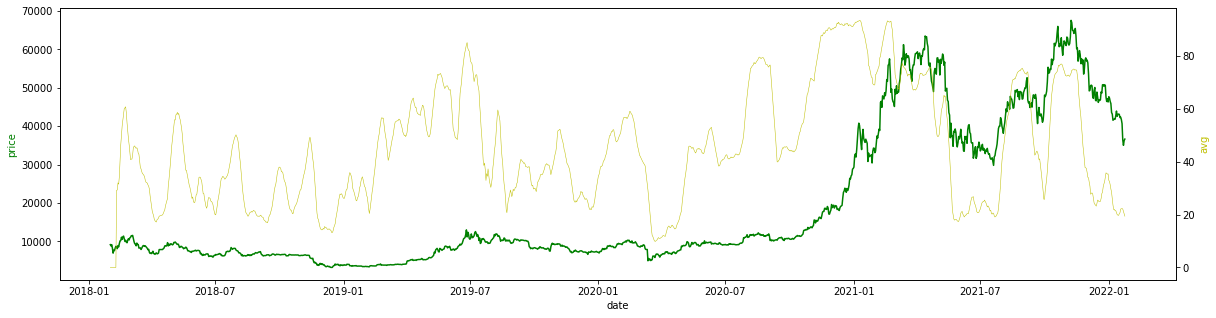

In [543]:
df = savedf

import numpy as np
import matplotlib.pyplot as plt

# slicing function
# df = df.iloc[np.r_[0:1000]]

def trailingAverage(df, n):
    df['avg'] = df['sentiment'].rolling(n).mean()
    return df

def replaceNaN(x):
    for i in range(len(x)):
        if np.isnan(x[i]):
            x[i] = 0
    return x

def turnNumbersToPerecentes(x):
    for i in range(len(x)):
        x[i] = ("{:.2%}".format( x[i]/ 100)) 

    return x

date = df['date'].tolist()
sentiment = df['sentiment'].tolist()
price = df['price'].tolist()
avg = trailingAverage(df, 10)['avg'].tolist()
avg = replaceNaN(avg)

# avg = turnNumbersToPerecentes(avg)

# correlation = df['price'].corr(df['avg'])
# correlation = ("{:.2%}".format(correlation))
# correlation

plt.rcParams["figure.figsize"] = (20,5) 

x = np.arange(0, 10, 0.1) 
y1 = 0.05 * x**2 
y2 = -1 *y1 

fig, ax1 = plt.subplots() 

ax2 = ax1.twinx() 
ax1.plot(date, price, 'g-') 
ax2.plot(date, avg, 'y-', linewidth=.5) 

ax1.set_xlabel('date') 
ax1.set_ylabel('price', color='g') 
ax2.set_ylabel('avg', color='y')
